# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train.csv")
rawvalid = pd.read_csv("Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [3]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [4]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [5]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 14ms/step - loss: 1.0577 - accuracy: 0.6421 - val_loss: 1.0318 - val_accuracy: 0.6347
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.9823 - accuracy: 0.6799 - val_loss: 0.9745 - val_accuracy: 0.6199
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.9136 - accuracy: 0.6709 - val_loss: 0.9271 - val_accuracy: 0.6089
Epoch 4/1000
18/18 [===

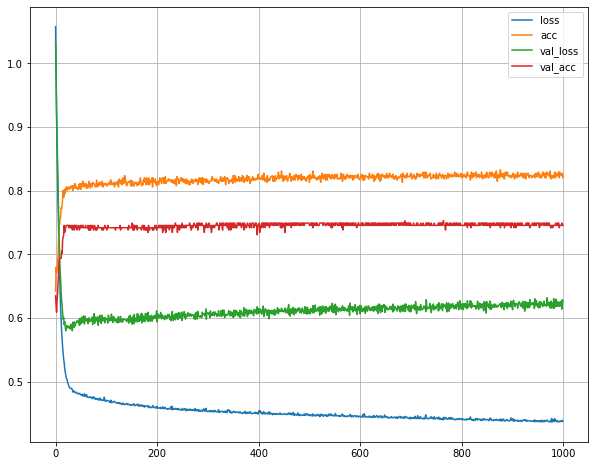

In [6]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [7]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6243715286254883
Validation accuracy: 0.7453874349594116


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

In [8]:
feature_extension_f1_f4 = ['F1','F2','F3','F4']

In [9]:
# Extract features
x_train_raw = train[feature_extension_f1_f4]
x_valid_raw = valid[feature_extension_f1_f4]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [10]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               1280      
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 11ms/step - loss: 1.0629 - accuracy: 0.5378 - val_loss: 1.0476 - val_accuracy: 0.4834
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9892 - accuracy: 0.5701 - val_loss: 1.0070 - val_accuracy: 0.4982
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9272 - accuracy: 0.6025 - val_loss: 0.9726 - val_accuracy: 0.5424
Epoch 4/1000
18/18 [=

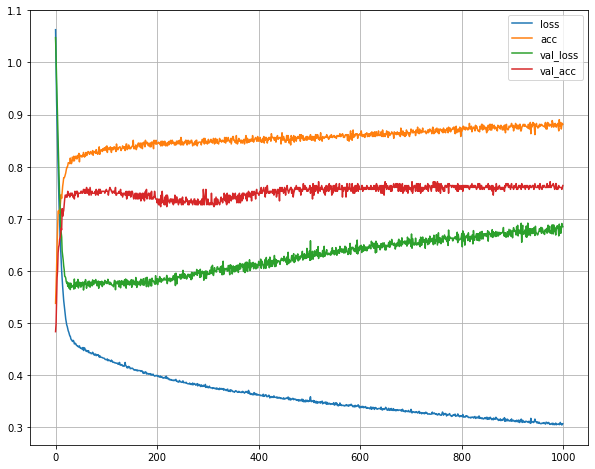

In [11]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [12]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6847527623176575
Validation accuracy: 0.7638376355171204


Increased features to include b1-b4

In [13]:
feature_extension_f1_b4 = ['F1','F2','F3','F4','B1','B2','B3','B4']

In [14]:
# Extract features
x_train_raw = train[feature_extension_f1_b4]
x_valid_raw = valid[feature_extension_f1_b4]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [15]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               2304      
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 1s 11ms/step - loss: 1.0624 - accuracy: 0.5935 - val_loss: 1.0349 - val_accuracy: 0.5535
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.9838 - accuracy: 0.6295 - val_loss: 0.9907 - val_accuracy: 0.5461
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.9241 - accuracy: 0.6331 - val_loss: 0.9530 - val_accuracy: 0.5535
Epoch 4/1000
18/18 [=

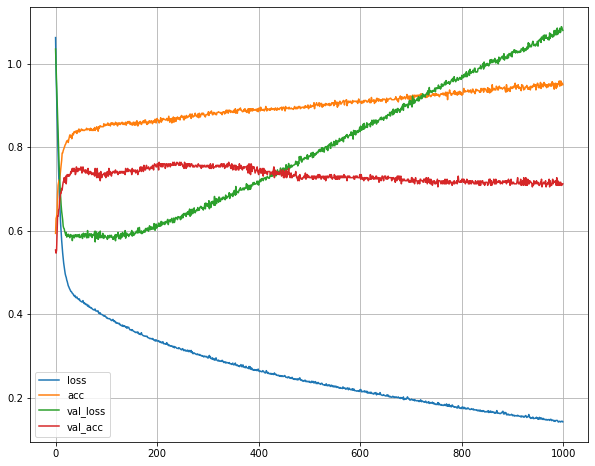

In [16]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [17]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 1.0796527862548828
Validation accuracy: 0.7121770977973938


## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

In [18]:
# Create a model with a single hidden layer
#Changed(reduced) number of nodes to 64
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 3)                 195       
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Epoch 1/1000
18/18 [==============================] - 0s 10ms/step - loss: 1.0887 - accuracy: 0.4424 - val_loss: 1.0728 - val_accuracy: 0.4465
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0459 - accuracy: 0.5198 - val_loss: 1.0470 - val_accuracy: 0.4428
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0099 - accuracy: 0.5288 - val_loss: 1.0221 - val_accuracy: 0.4908
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9761 - accuracy: 0.5701 - val_loss: 1.0007 - val_accuracy: 0.5203
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9446 - accuracy: 0.6007 - val_loss: 0.9802 - val_accuracy: 0.5461
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9172 - accuracy: 0.6187 - val_loss: 0.9596 - val_accuracy: 0.5535
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.8885 - accuracy: 0.6457 - val_loss: 0.9376 - val_accuracy: 0.5793
Epoch

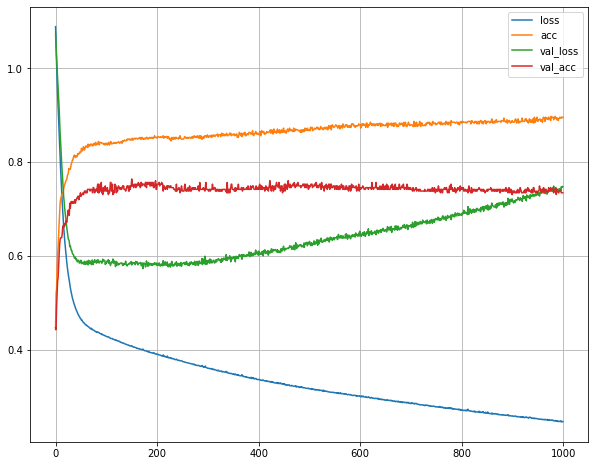

In [21]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [22]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.7476668953895569
Validation accuracy: 0.7343173623085022


    Same parameters but with dropout

In [23]:
# Create a model with a single hidden layer
#Changed(reduced) number of nodes to 64
#Added Dropout
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Epoch 1/1000
18/18 [==============================] - 0s 9ms/step - loss: 1.0787 - accuracy: 0.4622 - val_loss: 1.0605 - val_accuracy: 0.4982
Epoch 2/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0329 - accuracy: 0.5576 - val_loss: 1.0360 - val_accuracy: 0.5129
Epoch 3/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0010 - accuracy: 0.5917 - val_loss: 1.0150 - val_accuracy: 0.5203
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9673 - accuracy: 0.6097 - val_loss: 0.9975 - val_accuracy: 0.5424
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9486 - accuracy: 0.6169 - val_loss: 0.9815 - val_accuracy: 0.5646
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9209 - accuracy: 0.6223 - val_loss: 0.9656 - val_accuracy: 0.5646
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9046 - accuracy: 0.6547 - val_loss: 0.9484 - val_accuracy: 0.5830
Epoch 

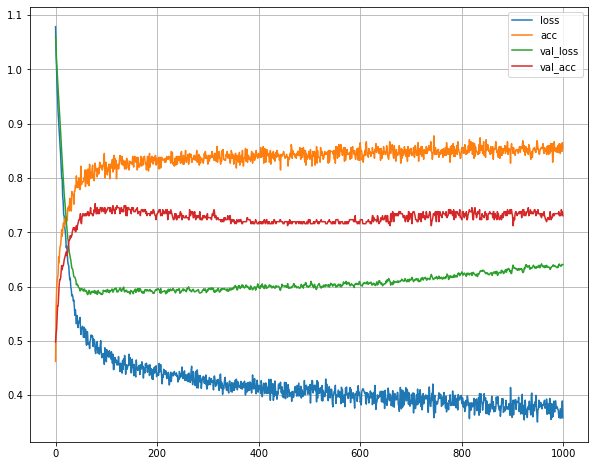

In [26]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [27]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6404811143875122
Validation accuracy: 0.7306272983551025


## Problem 3
Add multiple layers to the network and observe the results.

In [28]:
# Create a model with a single hidden layer
#Changed(reduced) number of nodes to 64
#from keras.layers import MaxPooling1D
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax),
  #  keras.layers.MaxPooling1D(pool_size = 2),
    keras.layers.Dense(64, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(phonemes),activation =tf.nn.softmax)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1152      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
 dense_12 (Dense)            (None, 64)                256       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,990
Trainable params: 1,990
Non-traina

In [29]:
# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Epoch 1/1000
18/18 [==============================] - 1s 11ms/step - loss: 1.0937 - accuracy: 0.3723 - val_loss: 1.0813 - val_accuracy: 0.4207
Epoch 2/1000
18/18 [==============================] - 0s 5ms/step - loss: 1.0563 - accuracy: 0.4946 - val_loss: 1.0674 - val_accuracy: 0.4207
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 1.0361 - accuracy: 0.5126 - val_loss: 1.0625 - val_accuracy: 0.4207
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0187 - accuracy: 0.5126 - val_loss: 1.0567 - val_accuracy: 0.4207
Epoch 5/1000
18/18 [==============================] - 0s 3ms/step - loss: 1.0061 - accuracy: 0.5072 - val_loss: 1.0496 - val_accuracy: 0.4207
Epoch 6/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9960 - accuracy: 0.5108 - val_loss: 1.0330 - val_accuracy: 0.4207
Epoch 7/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.9674 - accuracy: 0.5234 - val_loss: 1.0064 - val_accuracy: 0.4207
Epoch

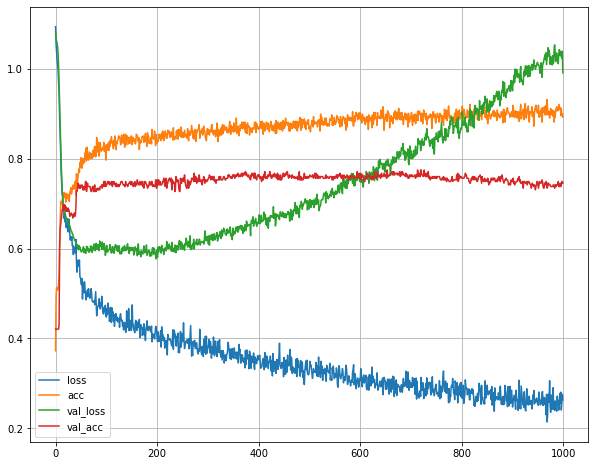

In [31]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [32]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.9910465478897095
Validation accuracy: 0.7453874349594116


## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

In [43]:
genders = ['M','F']
train = rawtrain[rawtrain['Gender'].isin(genders)]
valid = rawvalid[rawvalid['Gender'].isin(genders)]
#print(train)
#print(valid)

trainlabels = [genders.index(i) for i in train['Gender']]
validlabels = [genders.index(i) for i in valid['Gender']]

#Featre including bandwidths B1-B4
features = ['F1','F2','F3','F4','B1','B2','B3','B4']

#Get Features
x_train_raw = train[features]
x_valid_raw = valid[features]

#Normalize features(feature engineering)
x_mean  = np.mean(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

#Perform vectorization; change from 'categorical' to numeric(binary)
y_train = keras.utils.to_categorical(trainlabels, len(genders))
y_valid = keras.utils.to_categorical(validlabels, len(genders))

In [44]:
#Make model
model = keras.Sequential([
    keras.layers.Dense(516, activation = tf.nn.relu, input_dim = x_train.shape[1]),
    keras.layers.Dense(len(genders), activation = tf.nn.softmax),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation = tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(len(genders), activation = tf.nn.softmax)
])

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 516)               4644      
                                                                 
 dense_24 (Dense)            (None, 2)                 1034      
                                                                 
 dropout_8 (Dropout)         (None, 2)                 0         
                                                                 
 dense_25 (Dense)            (None, 256)               768       
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 2)                 514       
                                                                 
Total params: 6,960
Trainable params: 6,960
Non-traina

In [46]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [48]:
history = model.fit(x_train, y_train,
                    validation_data = (x_valid,y_valid),
                    epochs = 1000,
                    batch_size = 32, verbose = True)

Epoch 1/1000
394/394 [==============================] - 2s 2ms/step - loss: 0.5425 - accuracy: 0.7270 - val_loss: 0.4882 - val_accuracy: 0.7829
Epoch 2/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.5006 - accuracy: 0.7584 - val_loss: 0.4810 - val_accuracy: 0.7941
Epoch 3/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.7607 - val_loss: 0.4680 - val_accuracy: 0.7978
Epoch 4/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.7683 - val_loss: 0.4624 - val_accuracy: 0.8053
Epoch 5/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4626 - accuracy: 0.7831 - val_loss: 0.4706 - val_accuracy: 0.8032
Epoch 6/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4576 - accuracy: 0.7882 - val_loss: 0.4979 - val_accuracy: 0.7876
Epoch 7/1000
394/394 [==============================] - 1s 2ms/step - loss: 0.4476 - accuracy: 0.7964 - val_loss: 0.4916 - val_accuracy:

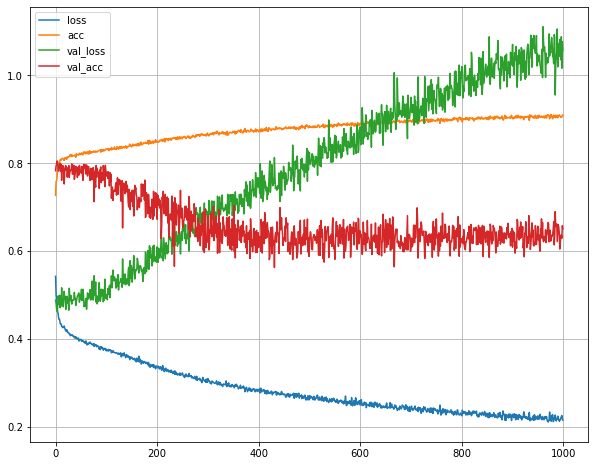

In [49]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [50]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 1.0567734241485596
Validation accuracy: 0.6506091356277466
